# UNEMPLOYMENT ANALYSIS IN INDIA

# 1. DATA UNDERSTANDING

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv") # Read the dataset

In [ ]:
df.head() # First 5 rows

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.tail() # Last 5 rows

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
df.shape # Shape of the dataset

(267, 9)

In [ ]:
df.info() # Basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe() # Statistical info about the dataset

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
df.isnull().sum() # Checking null values

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
df.duplicated().sum() # Check duplicate values

0

# 2. DATA CLEANING

In [ ]:
# Drop uneccessary column
df = df.drop(columns=['longitude','latitude'])

In [ ]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region'] # MOdifying column names

In [ ]:
# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Create a new column with month names
df['Month Name'] = df['Date'].dt.month_name()

In [ ]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'Month Name'],
      dtype='object')

# 3. EXPLORATORY DATA ANALYSIS

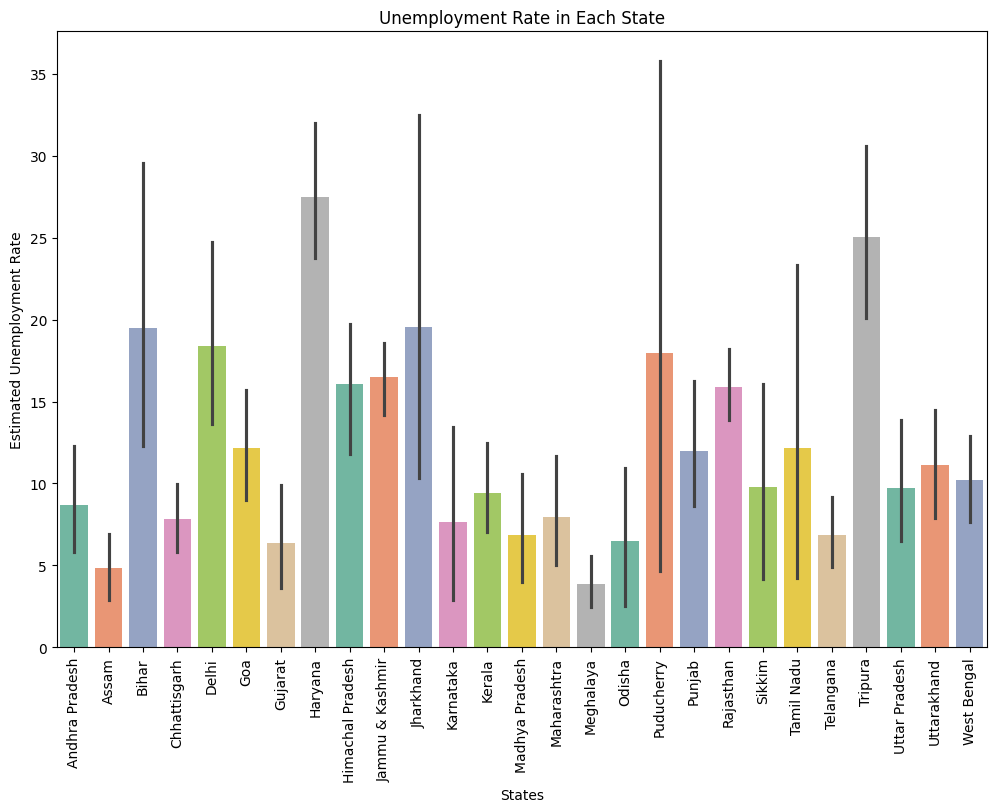

In [ ]:
# Unemployment Rate in Each State
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='States', y='Estimated Unemployment Rate', palette='Set2')
plt.title('Unemployment Rate in Each State')
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate')
plt.xticks(rotation=90)  # Rotating x labels for better readability
plt.show()

1. Haryana and Tripura has the highest unemployment rate during the pandemic. State lacks in job opportunities and unstable economy.
2. Meghalaya and Assam has seen the highest job opportunities in pandemic.
3. Odisha, Gujarat and Telangana has moderate rates and economic conditions are relatively well to other states.
4. Most of the states require new policies to improve the economic conditions and unemployment rate in their states.

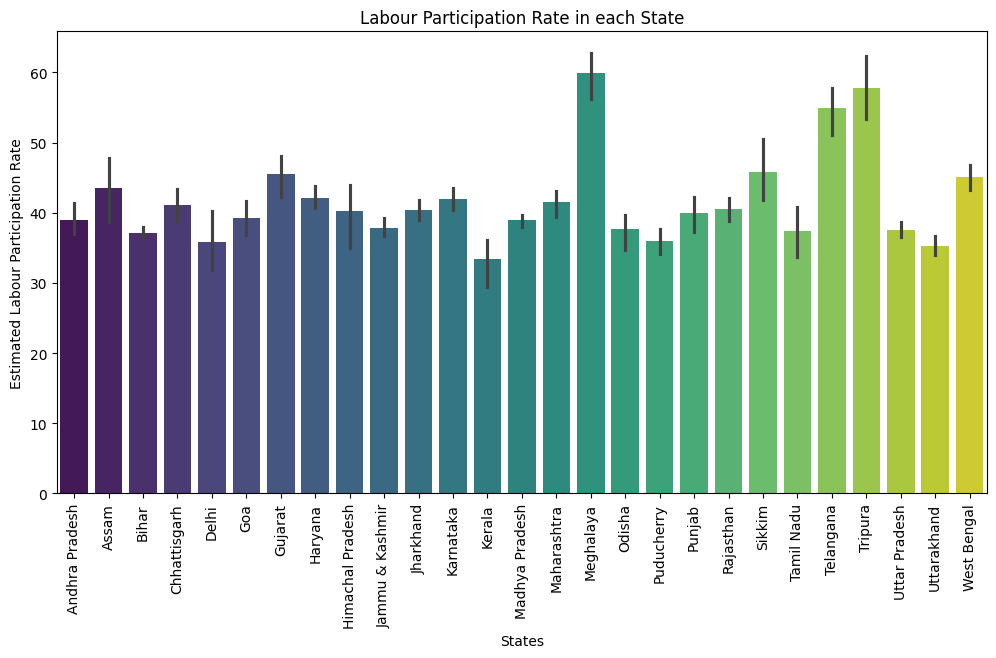

In [ ]:
# Labour Participation Rate by State
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='States', y='Estimated Labour Participation Rate', palette='viridis')
plt.title('Labour Participation Rate in each State')
plt.xlabel('States')
plt.ylabel('Estimated Labour Participation Rate')
plt.xticks(rotation=90)  # Rotating x labels for better readability
plt.show()

1. Meghalaya has the highest labour participation rate.
2. A higher level of economic activity and potential productivity has seen in Meghalaya, Tripura and Telangana.
3. Kerala has the lowest labour participation rate.
4. Kerala needs the most economic growth and new employment policies.

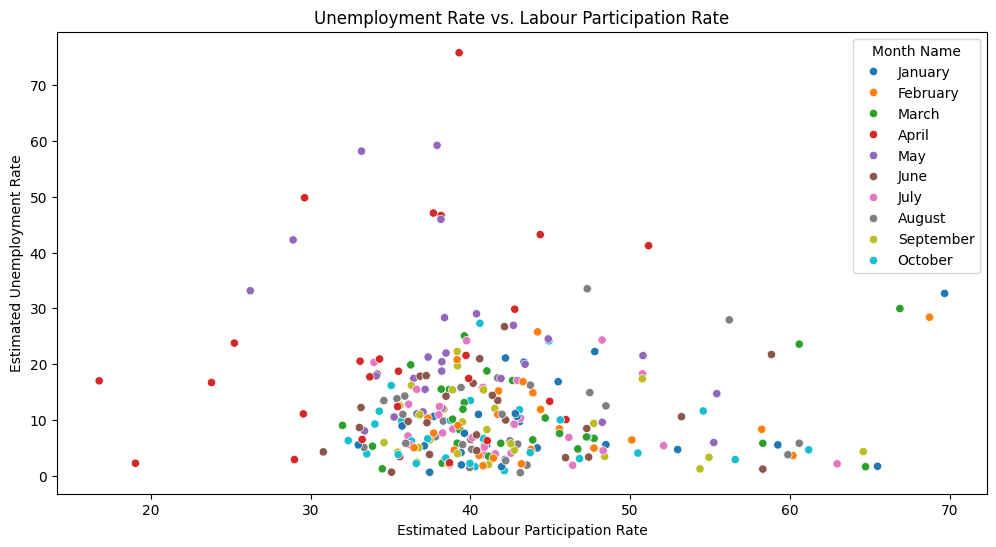

In [ ]:
# Unemployment Rate vs. Labour Participation Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate', y='Estimated Unemployment Rate',hue='Month Name')
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.show()

1. The higher labour participation rates has consistently correlate with lower unemployment rates.
2. There are clusters of points where certain ranges of labour participation rates seem to have varying unemployment rates.
3. At lower labour participation rates, there is a wider range of unemployment rates.

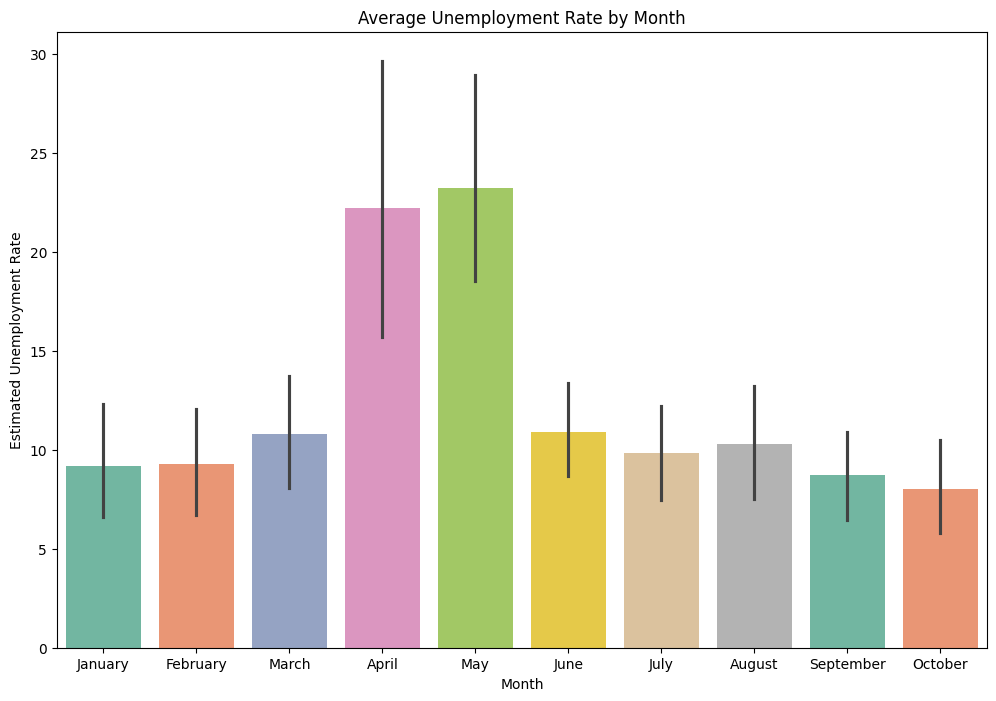

In [ ]:
# Average Unemployment Rate by Month
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Month Name', y='Estimated Unemployment Rate', palette='Set2')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

1. In March, the unemployment rate started to increase.
2. April and May saw the highest unemployment rates during the pandemic.
3. Conditions started to get better after May, but the rates were comparatively higher than in the first quarter of the year.

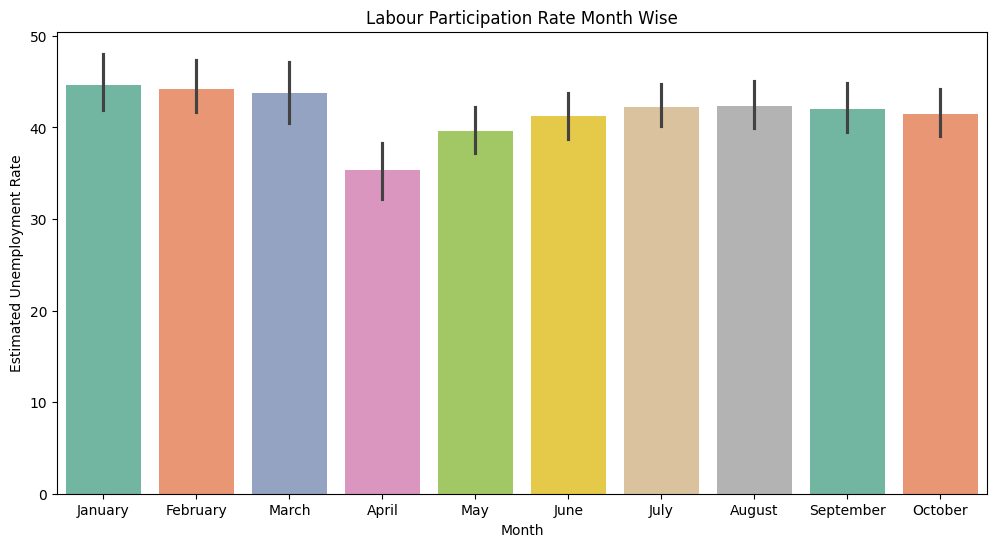

In [ ]:
# Labour Participation Rate Month Wise
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month Name', y='Estimated Labour Participation Rate', palette='Set2')
plt.title('Labour Participation Rate Month Wise')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

1. January had the highest labor participation rate. February and March had slightly lower rates compared to January.
2. April had the lowest labor participation rate.
3. After April, the labor participation rate was highest in August, and it maintained a normal rate throughout the following months.

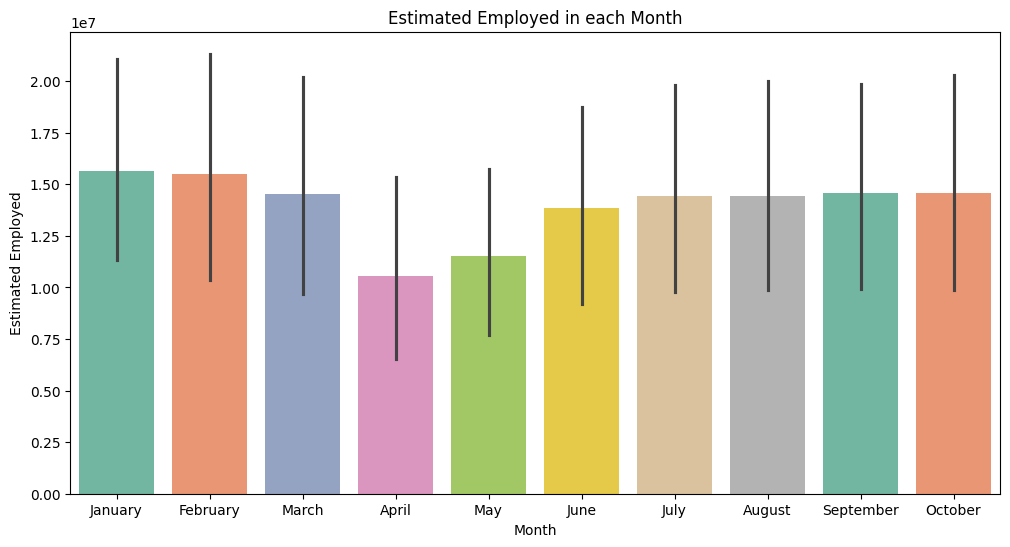

In [ ]:
# Estimated Employed in each Month
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month Name', y='Estimated Employed', palette='Set2')
plt.title('Estimated Employed in each Month')
plt.xlabel('Month')
plt.ylabel('Estimated Employed')
plt.show()

1. There was a huge drop in the number of employed people in April and May.
2. After January, the number of employed people started to decrease.
3. In July, conditions started to get back to normal, and the number of employed people began to increase.